### Taller 
integrantes: Johan Ayala y Daniel Mayor

## Ejercicio

Se realiza la instalación de los paquetes para poder usar la api para descargar los datos de la pagina del gobierno para los contratos vigentes del pais.

In [1]:
#!pip install sodapy

In [24]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("www.datos.gov.co","vONPsUHk0x930twQ9StlHQKi6",
                  username="jsaj360@gmail.com",
                  password="23y7#+t6gCG_eZy")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jbjy-vk9h", limit=1500000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

KeyboardInterrupt: 

Posterior al proceso anterior, se cargan las bases de datos y se les da una primera mirada para ver como están cargados.

In [3]:
results_df.shape

(1302659, 70)

In [8]:
results_df.head(3)

,nombre_entidad,nit_entidad,departamento,ciudad,localizaci_n,orden,sector,rama,entidad_centralizada,proceso_de_compra,...,sistema_general_de_participaciones,sistema_general_de_regal_as,recursos_propios_alcald_as_gobernaciones_y_resguardos_ind_genas_,recursos_de_credito,recursos_propios,ultima_actualizacion,codigo_entidad,fecha_inicio_liquidacion,fecha_fin_liquidacion,codigo_proveedor
0,SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR,899999034,Antioquia,Caldas,"Colombia, Antioquia , Caldas",Nacional,Trabajo,Ejecutivo,Descentralizada,CO1.BDOS.1107643,...,0,0,0,0,0,2020-12-31T00:00:00.000,704161553,2021-01-01 17:00:00,2021-05-01 04:59:00,708133640
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,9009585649,Distrito Capital de Bogotá,Bogotá,"Colombia, Bogotá, Bogotá",Territorial,Salud y Protección Social,Ejecutivo,Descentralizada,CO1.BDOS.646904,...,0,0,0,0,0,2021-07-10T00:00:00.000,702730482,NaN,NaN,703349027
2,MUNICIPIO DE SANTA ROSA DE CABAL,891480033,Risaralda,Santa Rosa De Cabal,"Colombia, Risaralda , Santa Rosa De Cabal",Territorial,Servicio Público,Ejecutivo,Descentralizada,CO1.BDOS.2265968,...,0,0,7572000,0,0,2021-11-03T00:00:00.000,705489250,NaN,NaN,715030144


In [4]:
results_df.columns

Index(['nombre_entidad', 'nit_entidad', 'departamento', 'ciudad',
       'localizaci_n', 'orden', 'sector', 'rama', 'entidad_centralizada',
       'proceso_de_compra', 'id_contrato', 'referencia_del_contrato',
       'estado_contrato', 'codigo_de_categoria_principal',
       'descripcion_del_proceso', 'tipo_de_contrato',
       'modalidad_de_contratacion', 'justificacion_modalidad_de',
       'fecha_de_firma', 'fecha_de_inicio_del_contrato',
       'fecha_de_fin_del_contrato', 'fecha_de_inicio_de_ejecucion',
       'fecha_de_fin_de_ejecucion', 'condiciones_de_entrega',
       'tipodocproveedor', 'documento_proveedor', 'proveedor_adjudicado',
       'es_grupo', 'es_pyme', 'habilita_pago_adelantado', 'liquidaci_n',
       'obligaci_n_ambiental', 'obligaciones_postconsumo', 'reversion',
       'valor_del_contrato', 'valor_de_pago_adelantado', 'valor_facturado',
       'valor_pendiente_de_pago', 'valor_pagado', 'valor_amortizado',
       'valor_pendiente_de', 'valor_pendiente_de_ejecucion'

Para efectos de este ejercicio, no se tendran encuenta los contratos que esten suspendidos, en aprovación, borrador o enviado Proovedor. \
Además de que se usara las columnas de nombre de entidad, sector, estado del contrato, valor del contrato, tipo de contrato y localización.

In [5]:
query='''
select nombre_entidad, sector, estado_contrato,orden, valor_del_contrato,tipo_de_contrato,localizaci_n
where estado_contrato !='Suspendido' 
and estado_contrato !='En aprobación'
and estado_contrato !='Borrador'
and estado_contrato !='enviado Proovedor'
limit 1500000
'''


results_2 = client.get("jbjy-vk9h", query=query)
results_df_2 = pd.DataFrame.from_records(results_2)

## Preguntas a responder 

¿Cuáles son los ingresos por sector?\
¿Cuál es la ciudad que más contrata?\
¿Cuál es la entidad con más volumenes de contratación?

In [24]:
results_df_2.head()

,nombre_entidad,sector,estado_contrato,orden,valor_del_contrato,tipo_de_contrato,localizaci_n,departamento
0,SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR,Trabajo,terminado,Nacional,36962200,Prestación de servicios,"Colombia, Antioquia , Caldas",Antioquia
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,Salud y Protección Social,terminado,Territorial,3100000,Prestación de servicios,"Colombia, Bogotá, Bogotá",Distrito Capital de Bogotá
2,MUNICIPIO DE SANTA ROSA DE CABAL,Servicio Público,En ejecución,Territorial,7572000,Prestación de servicios,"Colombia, Risaralda , Santa Rosa De Cabal",Risaralda
3,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,Ambiente y Desarrollo Sostenible,En ejecución,Territorial,15000000,Prestación de servicios,"Colombia, Magdalena , Santa Marta",Magdalena
4,DIRECCION DE SANIDAD EJERCITO DISPENSARIO MÉDI...,defensa,Activo,Nacional,6121332,Prestación de servicios,"Colombia, Bogotá, Bogotá",Distrito Capital de Bogotá


Dado que la columna Localizacion no tiene datos faltantes, es por medio de ella que obtendran los datos de departamento y de ciudad, como se ve en el siguiente codigo.

In [77]:
name = results_df_2['localizaci_n'].str.split(',',expand=True)
name.columns = ['pais', 'departamento','ciudad','ciudad_2']
name=name.drop(['ciudad_2','pais'],axis=1)
results_df_2 = pd.concat([results_df_2, name], axis=1)
results_df_2=results_df_2.drop(['localizaci_n'],axis=1)
results_df_2.head(10)

,nombre_entidad,sector,estado_contrato,orden,valor_del_contrato,tipo_de_contrato,departamento,ciudad
0,SENA REGIONAL ANTIOQUIA Grupo Administrativo CRNR,Trabajo,terminado,Nacional,36962200,Prestación de servicios,Antioquia,Caldas
1,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,Salud y Protección Social,terminado,Territorial,3100000,Prestación de servicios,Bogotá,Bogotá
2,MUNICIPIO DE SANTA ROSA DE CABAL,Servicio Público,En ejecución,Territorial,7572000,Prestación de servicios,Risaralda,Santa Rosa De Cabal
3,PARQUES NACIONALES NATURALES DE COLOMBIA - DIR...,Ambiente y Desarrollo Sostenible,En ejecución,Territorial,15000000,Prestación de servicios,Magdalena,Santa Marta
4,DIRECCION DE SANIDAD EJERCITO DISPENSARIO MÉDI...,defensa,Activo,Nacional,6121332,Prestación de servicios,Bogotá,Bogotá
5,SECRETARÍA DISTRITAL DE CULTURA RECREACIÓN Y ...,Cultura,Modificado,Territorial,247500000,Prestación de servicios,Bogotá,Bogotá
6,POLICIA METROPOLITANA DE PEREIRA,defensa,Activo,Nacional,1479600,Arrendamiento de inmuebles,Risaralda,Pereira
7,Secretaria Distrital de Integración Social - O...,Inclusión Social y Reconciliación,En ejecución,Territorial,19098000,Prestación de servicios,Bogotá,Bogotá
8,INSTITUTO DISTRITAL DE RECREACIÓN Y DEPORTE,Cultura,Modificado,Territorial,14777744,Prestación de servicios,Bogotá,Bogotá
9,DANE -DIRECCIÓN TERRITORIAL CENTRO,Información Estadística,En ejecución,Nacional,18053748,Prestación de servicios,Bogotá,Bogotá


In [40]:
len(results_df_2[results_df_2['g_nero_representante_legal']=='Otro'])

166

In [25]:
len(results_df_2[results_df_2['departamento']!='Distrito Capital de Bogotá'])

603524

In [9]:
results_df_2.shape

(1225240, 7)

In [42]:
results_df_2['ciudad'].unique()

array(['  Caldas', ' Bogotá', '  Santa Rosa De Cabal', '  Santa Marta',
       '  Pereira', '  Medellín', '  Cali', '  Envigado', None,
       '  Florencia', '  Barranquilla', '  Cúcuta',
       '  Sabanas De San Angel', '  Yopal', '  Valledupar',
       '  Candelaria', '  Mocoa', '  Vélez', '  Ibagué', '  Apartadó',
       '  Riohacha', '  Sabanalarga', '  Tunja', ' Floridablanca',
       '  Segovia', '  Sevilla', '  Cartagena', ' Cali', ' Nilo',
       '  Villa Del Rosario', '  Copacabana', '  Popayán', '  Armenia',
       '  Palmira', '  Pasto', '  Neiva', '  Bucaramanga',
       '  Villavicencio', '  Quibdó', ' Manizales',
       '  Guadalajara De Buga', '  Floridablanca', ' Medellín',
       '  San Carlos', '  Soacha', '  Fusagasugá', '  Arauca', '  Chía',
       ' Turbaco', '  Soledad', '  Yarumal', '  Manizales', '  Sincelejo',
       '  Sibaté', '  Girardot', '  Madrid', '  Barrancabermeja',
       '  Achí', '  La Virginia', '  San Gil', ' Cúcuta', '  Rionegro',
       '  Girón

In [43]:
results_df_2['departamento'].unique()

array(['  Antioquia ', ' Bogotá', '  Risaralda ', '  Magdalena ',
       '  Valle del Cauca ', '  Atlántico', '  Putumayo',
       '  Cundinamarca', '  Caquetá ', '  Atlántico ',
       '  Norte de Santander ', '  Santander', '  Casanare ', '  Cesar ',
       '  Putumayo ', '  Santander ', '  Tolima ', '  Tolima',
       '  Córdoba', '  La Guajira ', None, '  Boyacá ', ' Santander',
       '  Meta', '  Bolívar ', ' Valle del Cauca', ' Cundinamarca',
       '  Cauca ', '  Quindío ', '  Caldas', '  Nariño ', '  Huila ',
       '  Antioquia', '  Meta ', '  Chocó ', ' Caldas', '  Caquetá',
       '  Cesar', '  Norte de Santander', ' Antioquia', '  Cundinamarca ',
       '  Huila', '  Arauca ', '  La Guajira', ' Bolívar',
       '  Valle del Cauca', '  Vichada', '  Caldas ', '  Sucre ',
       '  Boyacá', ' Norte de Santander', '  Chocó',
       ' Departamento del Amazonas ', '  Cauca', '  Casanare', ' Boyacá',
       ' Sucre', '  Quindío', '  Vaupés', ' Quindío', ' Risaralda',
       ' Caq

In [12]:
results_df_2['orden'].unique()

array(['Nacional', 'Territorial', 'Corporación Autónoma'], dtype=object)

In [15]:
results_df_2['sector'].unique()

array(['Trabajo', 'Salud y Protección Social', 'Servicio Público',
       'Ambiente y Desarrollo Sostenible', 'defensa', 'Cultura',
       'Inclusión Social y Reconciliación', 'Información Estadística',
       'Hacienda y Crédito Público', 'Transporte',
       'No aplica/No pertenece', 'deportes', 'Minas y Energía',
       'Planeación', 'Vivienda, Ciudad y Territorio', 'agricultura',
       'Educación Nacional', 'Ley de Justicia', 'Industria',
       'Tecnologías de la Información y las Comunicaciones',
       'Ciencia Tecnología', 'interior', 'Presidencia de la República',
       'Inteligencia Estratégica y Contrainteligencia',
       'Relaciones Exteriores'], dtype=object)

In [16]:
import numpy as np
#import dataprep.eda as dp
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Layout
import ipywidgets as widgets

In [20]:
results_df_2['valor_del_contrato']= results_df_2['valor_del_contrato'].astype('int64')

In [21]:
results_df_2.dtypes

nombre_entidad        object
sector                object
estado_contrato       object
orden                 object
valor_del_contrato     int64
tipo_de_contrato      object
localizaci_n          object
dtype: object

In [56]:
a=results_df_2[['sector', 'valor_del_contrato']].groupby(['sector']).sum()
a=a.reset_index()
a.head(10)

,sector,valor_del_contrato
0,Ambiente y Desarrollo Sostenible,9699828758112
1,Ciencia Tecnología,403820739540
2,Cultura,3284702551421
3,Educación Nacional,9016464807449
4,Hacienda y Crédito Público,6021635575507
5,Inclusión Social y Reconciliación,7235116874801
6,Industria,4328564733077
7,Información Estadística,844738843763
8,Inteligencia Estratégica y Contrainteligencia,30108593943
9,Ley de Justicia,4843147709432


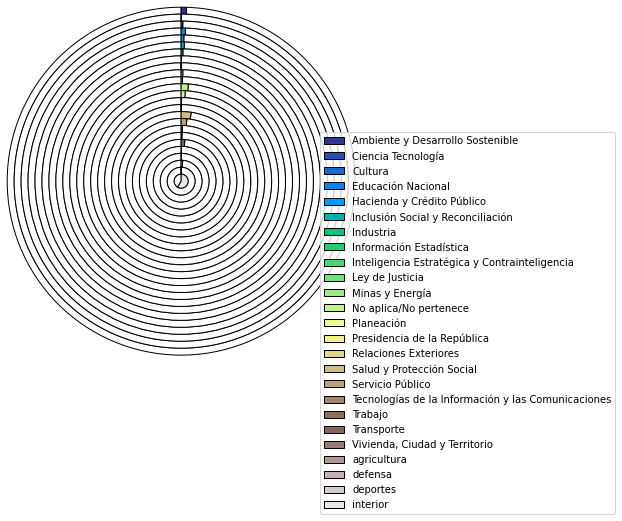

In [64]:
from matplotlib import cm


labels = a.sector
data = a.valor_del_contrato
#number of data points
n = len(a.valor_del_contrato)
#find max value for full ring
k = 10 ** int(np.log10(max(a.valor_del_contrato)))
m = k * (1 + max(a.valor_del_contrato) // k)

#radius of donut chart
r = 2
#calculate width of each ring
w = r / n 


colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}
                          , colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "black")
#plt.figure(figsize=(20,20))
plt.legend(loc="upper left", bbox_to_anchor=(0.9,0.75))
plt.show()

Dado que el interior es el sector con mayor presupuesto se procede a eliminarlo dado que no permite realizar una comparacion desagregada con los demas sectores, por ello el siguiente grafico se presenta sin la incidencia de este sector.

In [65]:
fg=a[a['sector']=='interior'].index
a=a.drop(fg)
a

,sector,valor_del_contrato
0,Ambiente y Desarrollo Sostenible,9699828758112
1,Ciencia Tecnología,403820739540
2,Cultura,3284702551421
3,Educación Nacional,9016464807449
4,Hacienda y Crédito Público,6021635575507
5,Inclusión Social y Reconciliación,7235116874801
6,Industria,4328564733077
7,Información Estadística,844738843763
8,Inteligencia Estratégica y Contrainteligencia,30108593943
9,Ley de Justicia,4843147709432


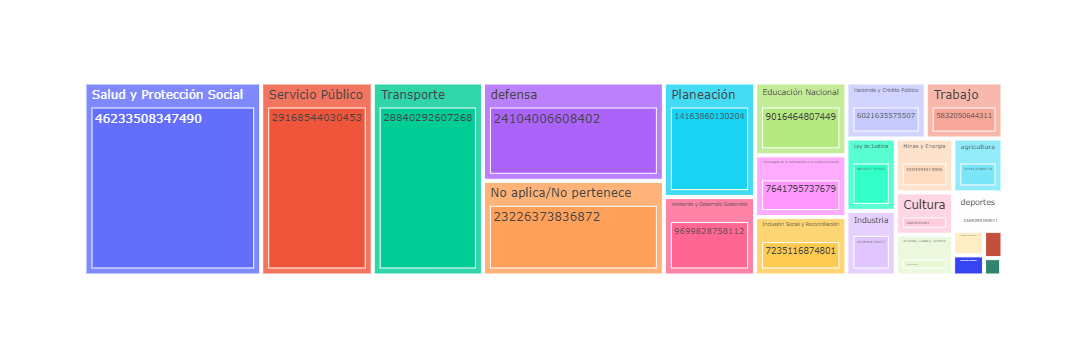

In [66]:
### mapa de arbol
fig = px.treemap(a, 
                 path= ['sector', 'valor_del_contrato'], 
                 values='valor_del_contrato',
                )
fig.show()

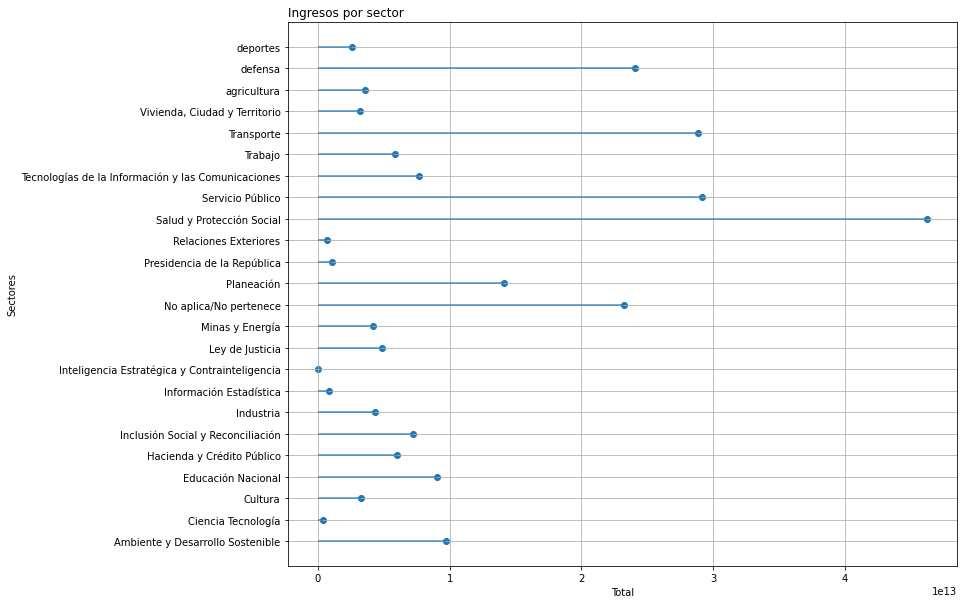

In [71]:
my_range=range(1,len(a.index)+1)
fig,ax=plt.subplots(figsize=(12,10))
# The vertcval plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
ax.hlines(y=my_range, xmin=0, xmax=a['valor_del_contrato'],  alpha=0.8)
ax.scatter(a['valor_del_contrato'], my_range, alpha=1)
 
# Add title and exis names
plt.yticks(my_range, a['sector'])
plt.title("Ingresos por sector", loc='left')
plt.xlabel('Total')
plt.ylabel('Sectores')
plt.grid()
plt.show()

Las anteriores gráficas corresponden al comportamiento de los ingresos según sector.

In [78]:
results_df_2.columns

Index(['nombre_entidad', 'sector', 'estado_contrato', 'orden',
       'valor_del_contrato', 'tipo_de_contrato', 'departamento', 'ciudad'],
      dtype='object')

Text(0.5, 0, 'Qualitative')

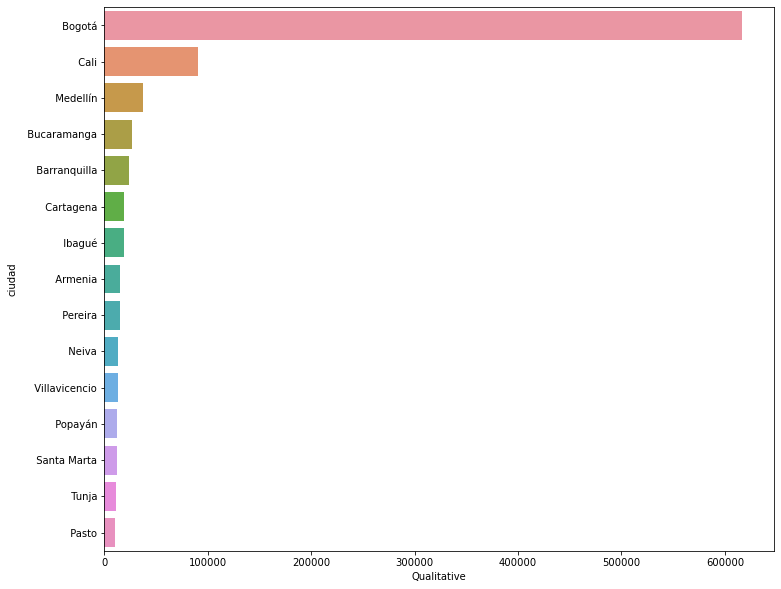

In [86]:
b=results_df_2[['ciudad', 'valor_del_contrato']].groupby(['ciudad']).count()
b = b.sort_values('valor_del_contrato',ascending=False)
b=b.reset_index()
b=b.head(15)
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(data=b, x="valor_del_contrato",y='ciudad')
ax.set_xlabel("Qualitative")

Por lo que se evidencia en la gr+afica anterior, la ciudad que más contrata es la de Bogotá.

Text(0.5, 0, 'Qualitative')

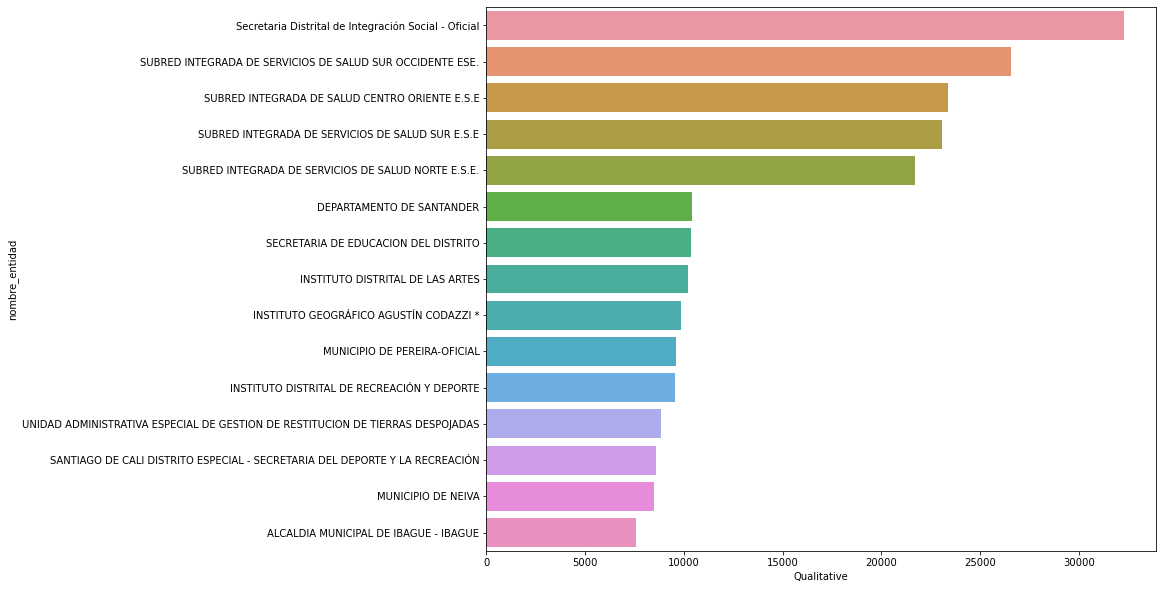

In [95]:
c=results_df_2[['nombre_entidad', 'valor_del_contrato']].groupby(['nombre_entidad']).count()
c = c.sort_values('valor_del_contrato',ascending=False)
c=c.reset_index()
c=c.head(15)
fig,ax=plt.subplots(figsize=(12,10))
sns.barplot(data=c, x="valor_del_contrato",y='nombre_entidad')
ax.set_xlabel("Qualitative")

La entidad con más volumen de contratación es la secretaria distrital de integración Social.